# Explore Injuries

In [1]:
import os
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## All Games

In [2]:
ALL_DATAPATH = '/.../data/all_players_all_match_info.csv'

all_data = pd.read_csv(ALL_DATAPATH, parse_dates=['startTimestamp', 'player_birth', 'previous_date'])
all_data

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,form_last1,form_last3,form_last5,form_last10,form_last20,form_last30,season,matchid,startTimestamp,previous_date,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,current_team,current_team_category,opponent,opponent_category,home_fixture,homeScore.normaltime,awayScore.normaltime,result,Performance
0,Messi,F,ARG,1987-06-24,Left,169,28.18,94,95,0,0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,15-16,6807357,2015-08-23 16:30:00,2015-06-06 18:45:00,LaLiga,laliga,8,1,Athletic Club,2825,Barcelona,2817,Barcelona,1,Athletic Club,0,0,0,1,1,7.8
1,Messi,F,ARG,1987-06-24,Left,169,28.20,94,95,0,0,NaN,6.0,8.60,NaN,NaN,NaN,NaN,NaN,15-16,6807380,2015-08-29 18:30:00,2015-08-23 16:30:00,LaLiga,laliga,8,2,Barcelona,2817,Málaga,2830,Barcelona,1,Málaga,0,1,1,0,1,9.4
2,Messi,F,ARG,1987-06-24,Left,169,28.24,94,95,0,0,NaN,14.0,9.00,NaN,NaN,NaN,NaN,NaN,15-16,6807400,2015-09-12 18:30:00,2015-08-29 18:30:00,LaLiga,laliga,8,3,Atlético Madrid,2836,Barcelona,2817,Barcelona,1,Atlético Madrid,1,0,1,2,1,8.6
3,Messi,F,ARG,1987-06-24,Left,169,28.25,94,95,0,0,NaN,4.0,8.45,8.525,NaN,NaN,NaN,NaN,15-16,6874271,2015-09-16 18:45:00,2015-09-12 18:30:00,"UEFA Champions League, Group E",uefa-champions-league,7,1,Roma,2702,Barcelona,2817,Barcelona,1,Roma,0,0,1,1,2,8.3
4,Messi,F,ARG,1987-06-24,Left,169,28.26,94,95,0,0,NaN,4.0,9.15,9.075,NaN,NaN,NaN,NaN,15-16,6807468,2015-09-20 18:30:00,2015-09-16 18:45:00,LaLiga,laliga,8,4,Barcelona,2817,Levante,2849,Barcelona,1,Levante,0,1,4,1,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,Azpilicueta,D,ESP,1989-08-28,Right,178,32.55,83,83,1,7,Knock,16.0,6.70,7.050,7.100000,7.081818,6.942857,6.961290,21-22,9576461,2022-03-10 19:30:00,2022-02-22 20:00:00,Premier League,premier-league,17,30,Norwich City,263,Chelsea,38,Chelsea,1,Norwich City,0,0,1,3,1,6.5
8439,Azpilicueta,D,ESP,1989-08-28,Right,178,32.57,83,83,1,5,Ill,6.0,6.90,7.025,7.116667,7.081818,6.971429,6.964516,21-22,10012261,2022-03-16 20:00:00,2022-03-10 19:30:00,UEFA Champions League,uefa-champions-league,7,4,Lille OSC,1643,Chelsea,38,Chelsea,1,Lille OSC,0,0,1,2,1,7.3
8440,Azpilicueta,D,ESP,1989-08-28,Right,178,32.58,83,83,0,0,NaN,3.0,7.30,7.000,7.133333,7.072727,6.985714,6.980645,21-22,10173211,2022-03-19 17:15:00,2022-03-16 20:00:00,FA Cup,fa-cup,19,3,Middlesbrough,36,Chelsea,38,Chelsea,1,Middlesbrough,0,0,0,2,1,7.3
8441,Azpilicueta,D,ESP,1989-08-28,Right,178,32.62,83,83,0,0,NaN,14.0,6.70,6.800,6.916667,7.000000,6.938095,6.958065,21-22,9576238,2022-04-02 14:00:00,2022-03-19 17:15:00,Premier League,premier-league,17,31,Chelsea,38,Brentford,50,Chelsea,1,Brentford,0,1,1,4,0,6.1


In [3]:
after_injury_matches = all_data[all_data['after_injury']==1]
non_injury_matches = all_data[all_data['after_injury']==0]

### From Pandas Profiling Report
1. Injury type count
2. Injury days

In [4]:
after_injury_matches
non_injury_matches

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,form_last1,form_last3,form_last5,form_last10,form_last20,form_last30,season,matchid,startTimestamp,previous_date,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,current_team,current_team_category,opponent,opponent_category,home_fixture,homeScore.normaltime,awayScore.normaltime,result,Performance
7,Messi,F,ARG,1987-06-24,Left,169,28.43,94,95,1,51,Medial Collateral Ligament Knee Injury,56.0,7.15,8.350,8.383333,NaN,NaN,NaN,15-16,6807548,2015-11-21 17:15:00,2015-09-26 14:00:00,LaLiga,laliga,8,12,Real Madrid,2829,Barcelona,2817,Barcelona,1,Real Madrid,1,0,0,4,1,7.4
13,Messi,F,ARG,1987-06-24,Left,169,28.54,94,95,1,3,Kidney problems,18.0,9.30,8.275,8.433333,8.390909,NaN,NaN,15-16,6807555,2015-12-30 19:30:00,2015-12-12 15:00:00,LaLiga,laliga,8,17,Barcelona,2817,Real Betis Balompié,2816,Barcelona,1,Real Betis Balompié,0,1,4,0,1,8.6
17,Messi,F,ARG,1987-06-24,Left,169,28.60,94,95,1,3,Thigh Problems,6.0,7.70,8.075,8.483333,8.209091,NaN,NaN,15-16,6807665,2016-01-23 15:00:00,2016-01-17 19:30:00,LaLiga,laliga,8,21,Málaga,2830,Barcelona,2817,Barcelona,1,Málaga,0,0,1,2,1,8.1
20,Messi,F,ARG,1987-06-24,Left,169,28.66,94,95,1,5,Kidney stone surgery,7.0,8.45,8.200,8.216667,8.190909,8.338095,NaN,15-16,6807599,2016-02-14 19:30:00,2016-02-07 11:00:00,LaLiga,laliga,8,24,Barcelona,2817,Celta Vigo,2821,Barcelona,1,Celta Vigo,0,1,6,1,1,9.2
40,Messi,F,ARG,1987-06-24,Left,169,28.99,94,95,1,13,Back bruise,28.0,8.80,8.600,8.850000,8.200000,8.504762,8.370968,15-16,7017881,2016-06-11 01:30:00,2016-05-14 15:00:00,"Copa America, Group D",copa-america,133,2,Argentina,4819,Panama,5164,Argentina,1,Panama,0,1,5,0,1,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,Modric,M,CRO,1985-09-09,Right,173,36.36,87,87,1,4,Knock,6.0,7.50,7.275,7.333333,7.390909,7.280952,7.416129,21-22,9603019,2022-01-08 20:00:00,2022-01-02 13:00:00,LaLiga,laliga,8,20,Real Madrid,2829,Valencia,2828,Real Madrid,1,Valencia,0,1,4,1,1,7.3
8335,Azpilicueta,D,ESP,1989-08-28,Right,178,30.35,84,84,1,2,Strain,4.0,6.85,7.400,7.416667,7.190909,7.152381,7.116129,19-20,8243581,2019-12-26 15:00:00,2019-12-22 16:30:00,Premier League,premier-league,17,19,Chelsea,38,Southampton,45,Chelsea,1,Southampton,0,1,0,2,0,7.1
8361,Azpilicueta,D,ESP,1989-08-28,Right,178,31.07,84,84,1,43,Hamstring Injury,44.0,6.05,6.450,6.983333,6.963636,7.009524,7.103226,20-21,8896998,2020-09-14 19:15:00,2020-08-01 16:30:00,Premier League,premier-league,17,1,Brighton & Hove Albion,30,Chelsea,38,Chelsea,1,Brighton & Hove Albion,0,0,1,3,1,6.5
8438,Azpilicueta,D,ESP,1989-08-28,Right,178,32.55,83,83,1,7,Knock,16.0,6.70,7.050,7.100000,7.081818,6.942857,6.961290,21-22,9576461,2022-03-10 19:30:00,2022-02-22 20:00:00,Premier League,premier-league,17,30,Norwich City,263,Chelsea,38,Chelsea,1,Norwich City,0,0,1,3,1,6.5


,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,form_last1,form_last3,form_last5,form_last10,form_last20,form_last30,season,matchid,startTimestamp,previous_date,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,current_team,current_team_category,opponent,opponent_category,home_fixture,homeScore.normaltime,awayScore.normaltime,result,Performance
0,Messi,F,ARG,1987-06-24,Left,169,28.18,94,95,0,0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,15-16,6807357,2015-08-23 16:30:00,2015-06-06 18:45:00,LaLiga,laliga,8,1,Athletic Club,2825,Barcelona,2817,Barcelona,1,Athletic Club,0,0,0,1,1,7.8
1,Messi,F,ARG,1987-06-24,Left,169,28.20,94,95,0,0,NaN,6.0,8.60,NaN,NaN,NaN,NaN,NaN,15-16,6807380,2015-08-29 18:30:00,2015-08-23 16:30:00,LaLiga,laliga,8,2,Barcelona,2817,Málaga,2830,Barcelona,1,Málaga,0,1,1,0,1,9.4
2,Messi,F,ARG,1987-06-24,Left,169,28.24,94,95,0,0,NaN,14.0,9.00,NaN,NaN,NaN,NaN,NaN,15-16,6807400,2015-09-12 18:30:00,2015-08-29 18:30:00,LaLiga,laliga,8,3,Atlético Madrid,2836,Barcelona,2817,Barcelona,1,Atlético Madrid,1,0,1,2,1,8.6
3,Messi,F,ARG,1987-06-24,Left,169,28.25,94,95,0,0,NaN,4.0,8.45,8.525,NaN,NaN,NaN,NaN,15-16,6874271,2015-09-16 18:45:00,2015-09-12 18:30:00,"UEFA Champions League, Group E",uefa-champions-league,7,1,Roma,2702,Barcelona,2817,Barcelona,1,Roma,0,0,1,1,2,8.3
4,Messi,F,ARG,1987-06-24,Left,169,28.26,94,95,0,0,NaN,4.0,9.15,9.075,NaN,NaN,NaN,NaN,15-16,6807468,2015-09-20 18:30:00,2015-09-16 18:45:00,LaLiga,laliga,8,4,Barcelona,2817,Levante,2849,Barcelona,1,Levante,0,1,4,1,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,Azpilicueta,D,ESP,1989-08-28,Right,178,32.47,83,83,0,0,NaN,17.0,7.40,7.300,7.150000,7.109091,6.966667,6.980645,21-22,10119253,2022-02-09 16:30:00,2022-01-23 16:30:00,Club World Cup,club-world-cup,357,2,Al-Hilal Saudi,21895,Chelsea,38,Chelsea,1,Al-Hilal Saudi,0,0,0,1,1,7.4
8437,Azpilicueta,D,ESP,1989-08-28,Right,178,32.51,83,83,0,0,NaN,13.0,7.15,7.225,7.116667,7.145455,6.971429,6.961290,21-22,10012255,2022-02-22 20:00:00,2022-02-09 16:30:00,UEFA Champions League,uefa-champions-league,7,4,Chelsea,38,Lille OSC,1643,Chelsea,1,Lille OSC,0,1,2,0,1,6.9
8440,Azpilicueta,D,ESP,1989-08-28,Right,178,32.58,83,83,0,0,NaN,3.0,7.30,7.000,7.133333,7.072727,6.985714,6.980645,21-22,10173211,2022-03-19 17:15:00,2022-03-16 20:00:00,FA Cup,fa-cup,19,3,Middlesbrough,36,Chelsea,38,Chelsea,1,Middlesbrough,0,0,0,2,1,7.3
8441,Azpilicueta,D,ESP,1989-08-28,Right,178,32.62,83,83,0,0,NaN,14.0,6.70,6.800,6.916667,7.000000,6.938095,6.958065,21-22,9576238,2022-04-02 14:00:00,2022-03-19 17:15:00,Premier League,premier-league,17,31,Chelsea,38,Brentford,50,Chelsea,1,Brentford,0,1,1,4,0,6.1


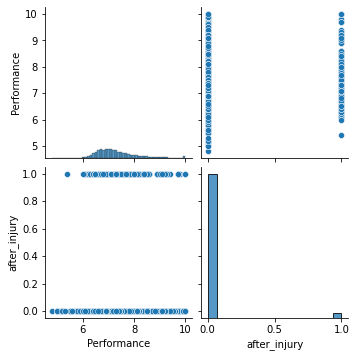

In [5]:
sns.pairplot(data = all_data, vars=['Performance','after_injury']);

In [6]:
from scipy.stats import ttest_ind

ttest_ind(after_injury_matches['Performance'], non_injury_matches['Performance'])

Ttest_indResult(statistic=-1.8894082237660588, pvalue=0.05887139041481911)

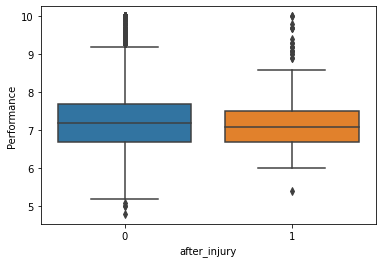

In [7]:
sns.boxplot(x= all_data.after_injury, y=all_data.Performance);
plt.show();